In [1]:
import numpy as np
import os
from PIL import Image
import meshplot as mp
import copy
from tqdm.notebook import tqdm

import json
import itertools
import ijson


In [2]:
def merge_images_horizontally(img1, img2):
    """
    Merge two PIL images horizontally into one image.

    Args:
    img1 (PIL.Image): The first image.
    img2 (PIL.Image): The second image.

    Returns:
    PIL.Image: A new image consisting of img1 and img2 merged horizontally.
    """
    # Determine the new image dimensions
    width1, height1 = img1.size
    width2, height2 = img2.size
    new_width = width1 + width2
    new_height = max(height1, height2)

    # Create a new image with the appropriate height
    new_img = Image.new('RGBA', (new_width, new_height))

    # Paste the first image
    new_img.paste(img1, (0, 0))

    # Paste the second image aligned top
    new_img.paste(img2, (width1, 0))

    return new_img


In [3]:
def create_image_grid(all_imgs, grid_size=(6, 5)):
    image_size = all_imgs[0].size
    
    # Create a new image with a white background
    grid_image = Image.new('RGBA', (image_size[0] * grid_size[0], image_size[1] * grid_size[1]), 'white')

    # Load images and paste them into the grid
    for index, img in enumerate(all_imgs[:grid_size[0] * grid_size[1]]):
        img = img.resize(image_size)  # Resize image if needed
        x = index % grid_size[0] * image_size[0]
        y = index // grid_size[0] * image_size[1]
        grid_image.paste(img, (x, y))

    # Return the final image
    return grid_image

In [4]:
def visualize_pointcloud(pc_np):
    v = copy.deepcopy(pc_np) ## Just in case anything goes wrong
    mi = np.min(v, axis=0)
    ma = np.max(v, axis=0)

    shading = {"flat":True, # Flat or smooth shading of triangles
            "wireframe":False, "wire_width": 0.03, "wire_color": "black", # Wireframe rendering
            "width": 600, "height": 600, # Size of the viewer canvas
            "antialias": True, # Antialising, might not work on all GPUs
            "scale": 2.0, # Scaling of the model
            "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
            "colormap": "viridis", "normalize": [None, None], # Colormap and normalization for colors
            "background": "#ffffff", # Background color of the canvas
            "line_width": 1.0, "line_color": "black", # Line properties of overlay lines
            "bbox": False, # Enable plotting of bounding box
            "point_color": "blue", "point_size": 0.02 # Point properties of overlay points
            }

    p = mp.plot(v, shading=shading, return_plot=True)

    # # Instead of adding edges in the form of (v, f), also lines of the form (start, end) can be added
    # p.add_lines(v[f[:,0]], v[f[:,1]], shading={"line_color": "red"});

    # # The vertex positions can be updated as well
    # v += 0.003 * np.random.rand(v.shape[0], v.shape[1])
    # # The plotted objects get increasing ids. In this case the mesh object has id 0, and the lines object id 1.
    # p.update_object(vertices=v)


In [5]:
def load_captions(json_path):
    with open(json_path, 'r') as f:
        captions_data = json.load(f)
    return captions_data

In [6]:
# def read_json_lines(file_path, num_lines=50):
#     with open(file_path, 'r') as f:
#         for i in range(num_lines):
#             line = f.readline()
#             print(line.strip())
# 
# path_json = os.path.join(path_data, 'ULIP-shapenet_triplets_captions.json')
# read_json_lines(path_json)

'''
{
"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_000.png": [
"a low to the ground airplane on a gray background",
"a jet fighter plane flying through a gray sky",
"a picture of an airplane flying in the air",
"a white airplane in the air against a gray background",
"an image of an airplane flying in the sky",
"an aerial view of a small airplane",
"an airplane is seen in the sky",
"this is the side view of an airplane",
"the airplane is flying through the sky",
"there is an airplane in the sky looking down on the ground"
],
"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_096.png": [
"a model plane on a gray background",
"a gray airplane model flying in the sky",
"a gray model of a passenger jet sitting in the air",
"a 3D cut out airplane against a gray background",
"an airplane is in flight, moving forward and in a slightly downward direction",
"a jet fighter airplane that is on a grey day",
"an airplane flying through the air with a gray background",
"this is an airplane that is made of paper",
"a gray airplane with a cockpit that is flying through the air",
"a plane that looks as if it's not on the ground"
],
"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_192.png": [
"the low quality image of an airplane that was not animated",
"a 3d rendered airplane, shown in an unnatural perspective",
"a model airplane in 3d on a gray background",
"a plane is on its top view facing forward",
"a plane that appears to be in flight",
"an airplane that is laying on its side",
"a white plane flying in the sky",
"a large blue and white airplane flying high",
"a jet airplane from a far distance is floating in the sky",
"a very large paper plane in the air"
],
"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_288.png": [
"this is a render of a plane in a gray background",
"a white fighter jet that is hovering over a grey background",
"an airplane is flying in a grey background",
"a white plane is seen in a grey background",
"a model airplane on a dark gray background",
"a 3d image of a large airplane on a gray background",
"there is a small grey plane on a grey surface",
"a white aircraft flies past a grey building",
"there is a white airplane flying in the sky",
"there is a white passenger jet in the sky"
],
"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-1021a0914a7207aff927ed529ad90a11/02691156-1021a0914a7207aff927ed529ad90a11_r_024.png": [
'''

'\n{\n"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_000.png": [\n"a low to the ground airplane on a gray background",\n"a jet fighter plane flying through a gray sky",\n"a picture of an airplane flying in the air",\n"a white airplane in the air against a gray background",\n"an image of an airplane flying in the sky",\n"an aerial view of a small airplane",\n"an airplane is seen in the sky",\n"this is the side view of an airplane",\n"the airplane is flying through the sky",\n"there is an airplane in the sky looking down on the ground"\n],\n"/export/einstein-vision/3d_vision/3d_object_datasets/ShapeNetCore.v2/rendered_images_P80/02691156-10155655850468db78d106ce0a280f87/02691156-10155655850468db78d106ce0a280f87_r_096.png": [\n"a model plane on a gray background",\n"a gray airplane model flying in the sky",\n"a gray model of a passenger jet sitting in the air",\

In [7]:
def process_index(all_files, all_angles, path_caption_data, index=None):
    if index == None:
        index = np.random.randint(len(all_files))
        
    name = all_files[index][:-4]
    pc_np = np.load(os.path.join(path_data_pc, name + ".npy"))
    print("pc_np.shape: ")
    print(pc_np.shape)
    
    data = {'pointcloud_np': pc_np}
    
    captions_data = load_captions(os.path.join(path_caption_data, name + ".json"))
    
    caption_missing = 0
    
    all_mg_imgs = []
    RGB_imgs = []
    depth_imgs = []
    for i, angle in enumerate(all_angles):
        img_name = name + f"_r_{angle:03d}.png"
        img_depth_name = name + f"_r_{angle:03d}_depth0001.png"
        
        img_path = os.path.join(path_data_rgb, img_name)
        img_depth_path = os.path.join(path_data_rgb, img_depth_name)
        
        if img_name in captions_data:
            captions_rgb = captions_data[img_name]
        else:
            captions_rgb = [""] * 10  # 如果找不到对应的描述，使用空描述
            caption_missing += 1
            
        if img_depth_name in captions_data:
            captions_depth = captions_data[img_depth_name]
        else:
            captions_depth = [""] * 10  # 如果找不到对应的描述，使用空描述
            caption_missing += 1
            
        img_a = Image.open(img_path)
        img_depth_a = Image.open(img_depth_path)
        
        all_mg_imgs.append(merge_images_horizontally(img_a, img_depth_a))
        RGB_imgs.append(img_a)
        depth_imgs.append(img_depth_a)
        
        data[f'angle_{i+1}'] = {
            'angle': angle,
            'image_rgb': img_a,
            'captions_rgb': captions_rgb,
            'image_depth': img_depth_a,
            'captions_depth': captions_depth
        }
        
    print("!!!" + str(caption_missing) + " captions are missing!!!")
    
    all_mg_imgs_show = create_image_grid(all_mg_imgs)
    RGB_imgs_show = create_image_grid(RGB_imgs)
    depth_imgs_show = create_image_grid(depth_imgs)
        
    # (all_mg_imgs, RGB_imgs, depth_imgs)
    
    return data, (all_mg_imgs_show, RGB_imgs_show, depth_imgs_show)

In [8]:
path_data = "/mnt/disk2/iLori/ShapeNet-55-ULIP-2-triplets"
path_data_pc = os.path.join(path_data, "shapenet_pc")
path_data_rgb = os.path.join(path_data, "only_rgb_depth_images")
path_caption_data = os.path.join(path_data, 'captions')


In [9]:
all_files = sorted(os.listdir(path_data_pc))
print(all_files[:10])

['02691156-10155655850468db78d106ce0a280f87.npy', '02691156-1021a0914a7207aff927ed529ad90a11.npy', '02691156-1026dd1b26120799107f68a9cb8e3c.npy', '02691156-103c9e43cdf6501c62b600da24e0965.npy', '02691156-105f7f51e4140ee4b6b87e72ead132ed.npy', '02691156-1066b65c30d153e04c3a35cee92bb95b.npy', '02691156-106dfe858cb8fbc2afc6b80d80a265ab.npy', '02691156-10aa040f470500c6a66ef8df4909ded9.npy', '02691156-10af5de930178a161596c26b5af806fe.npy', '02691156-10c7cdfdffe2243b88a89a28f04ce622.npy']


In [10]:
print(len(all_files))

52470


In [11]:
'''
point cloud file: 52470
point cloud caption: 52468

2 files are missing captions
'''

'\npoint cloud file: 52470\npoint cloud caption: 52468\n\n2 files are missing captions\n'

In [12]:
all_angles = np.arange(0, 360, 12)
print(len(all_angles))

30


In [85]:
data, (all_mg_imgs_show, RGB_imgs_show, depth_imgs_show) = process_index(all_files, all_angles, path_caption_data)

pc_np.shape: 
(8192, 3)
!!!0 captions are missing!!!


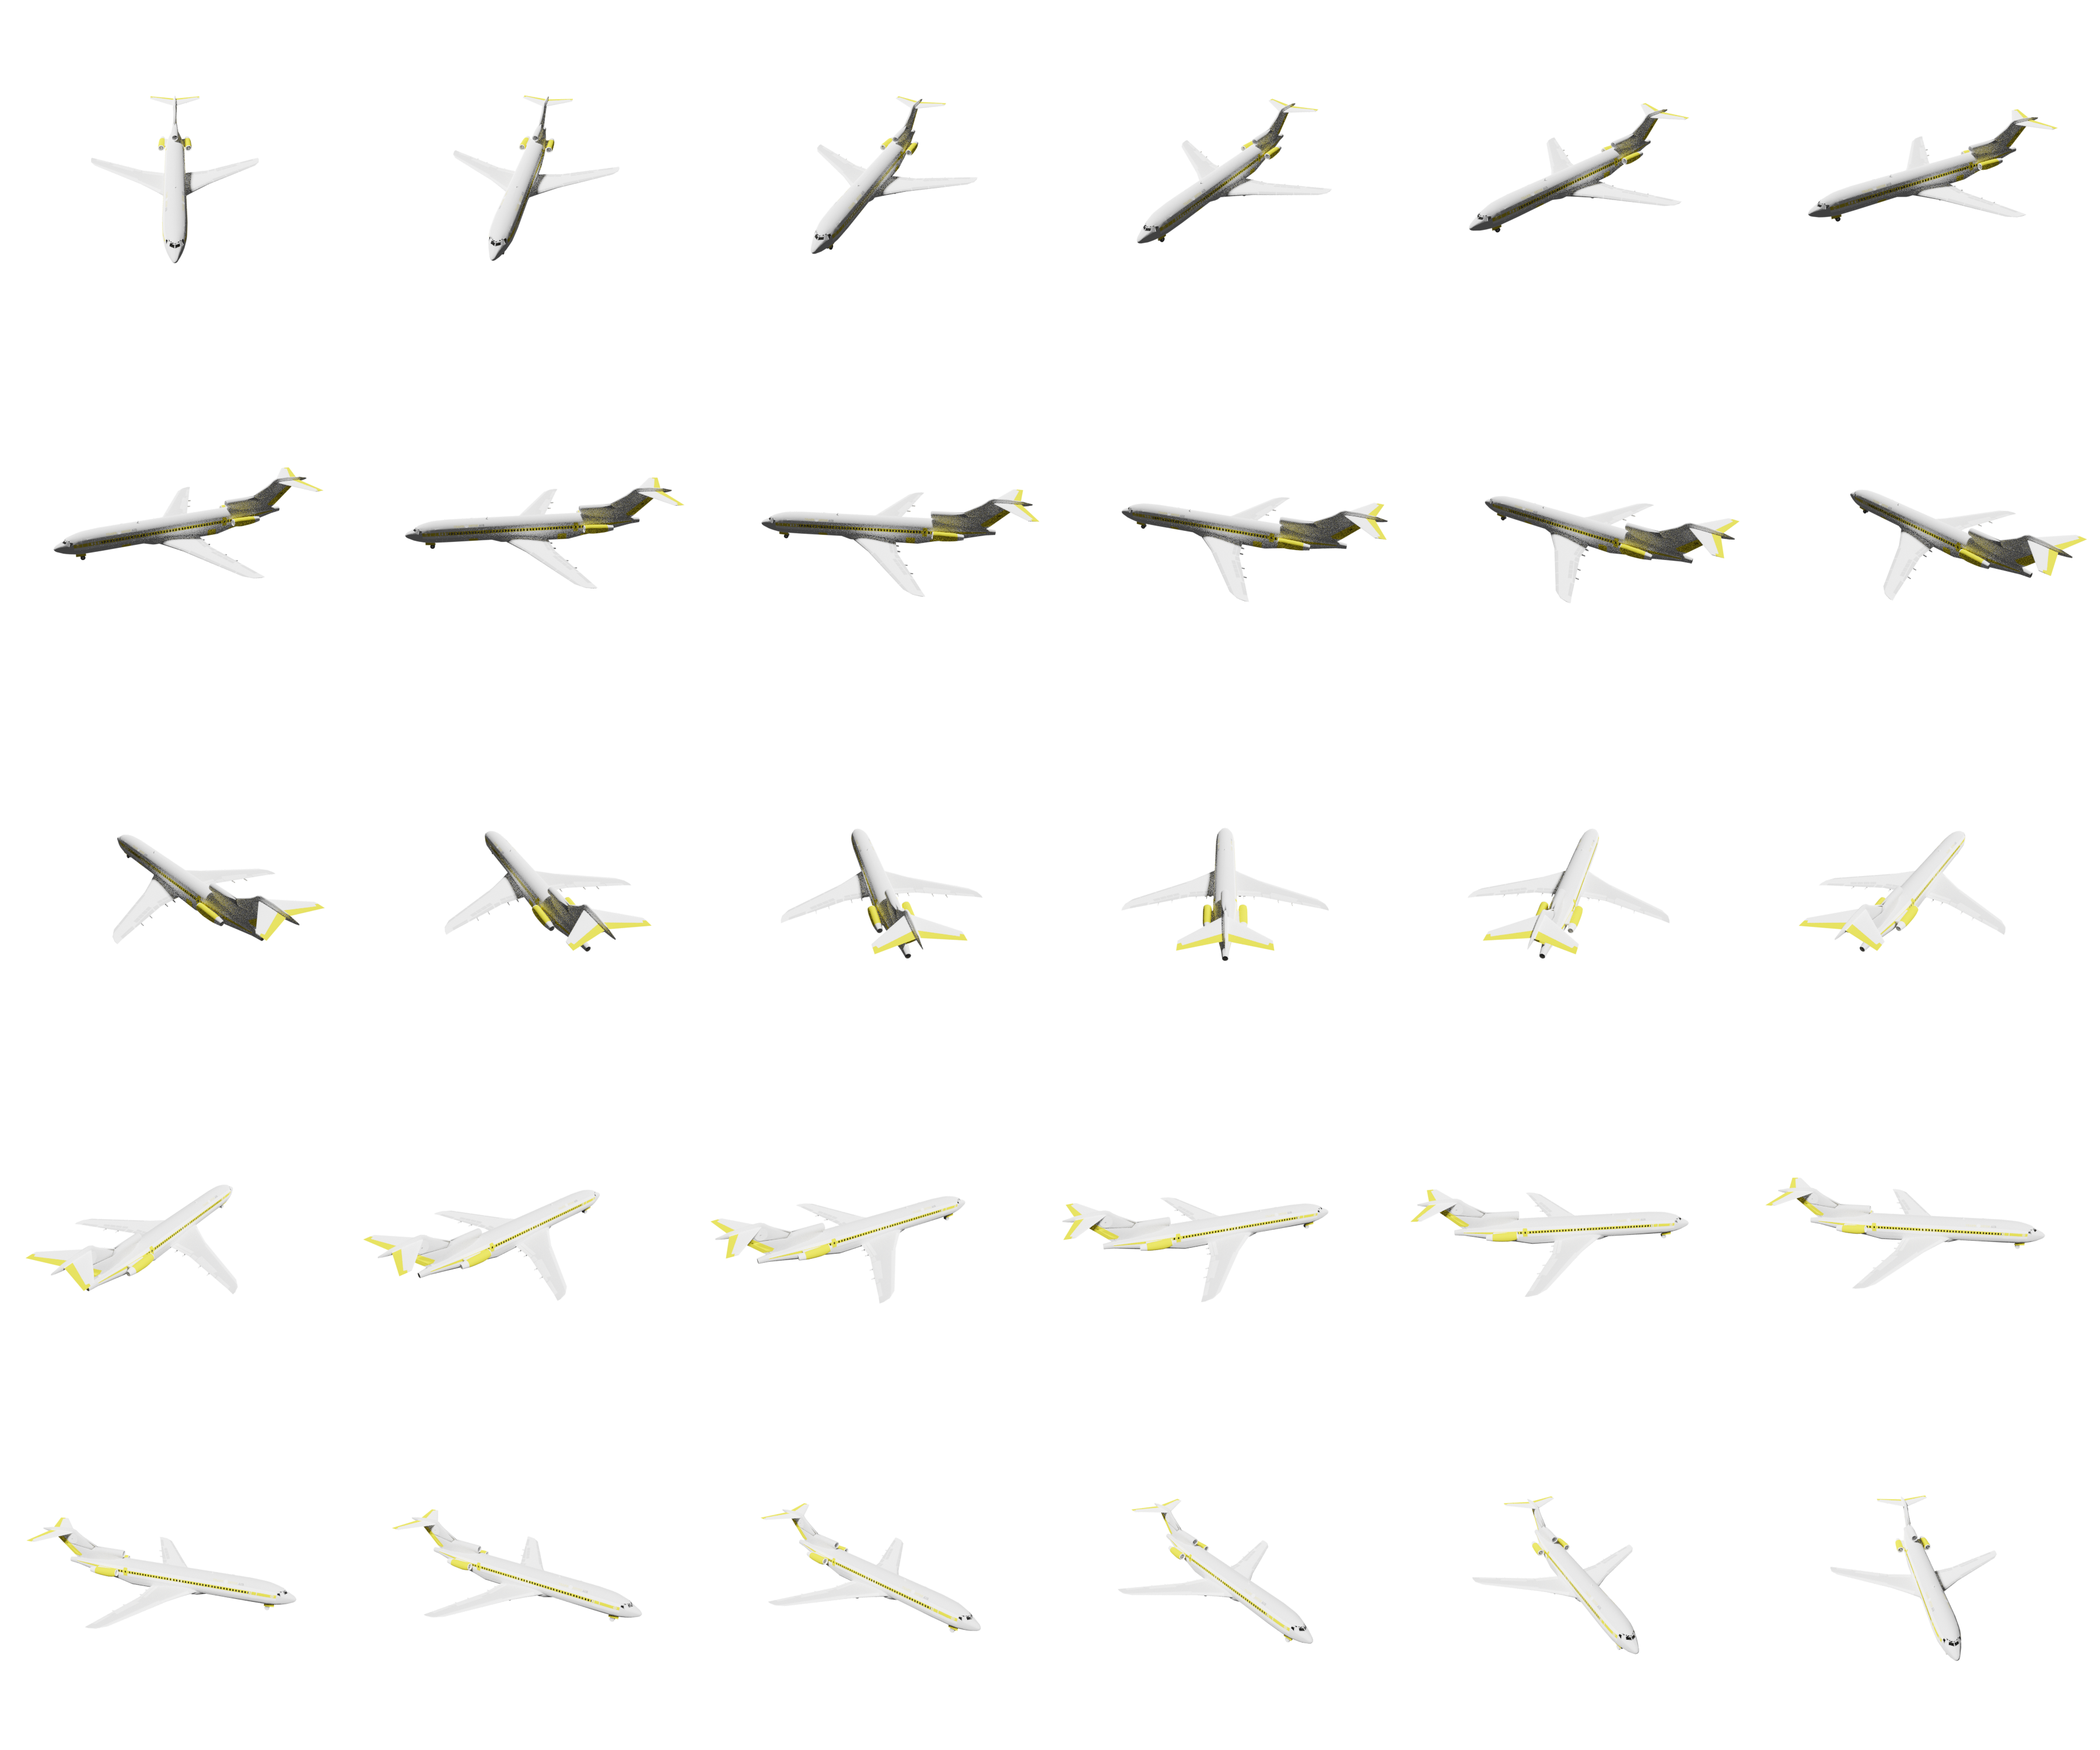

In [86]:
RGB_imgs_show

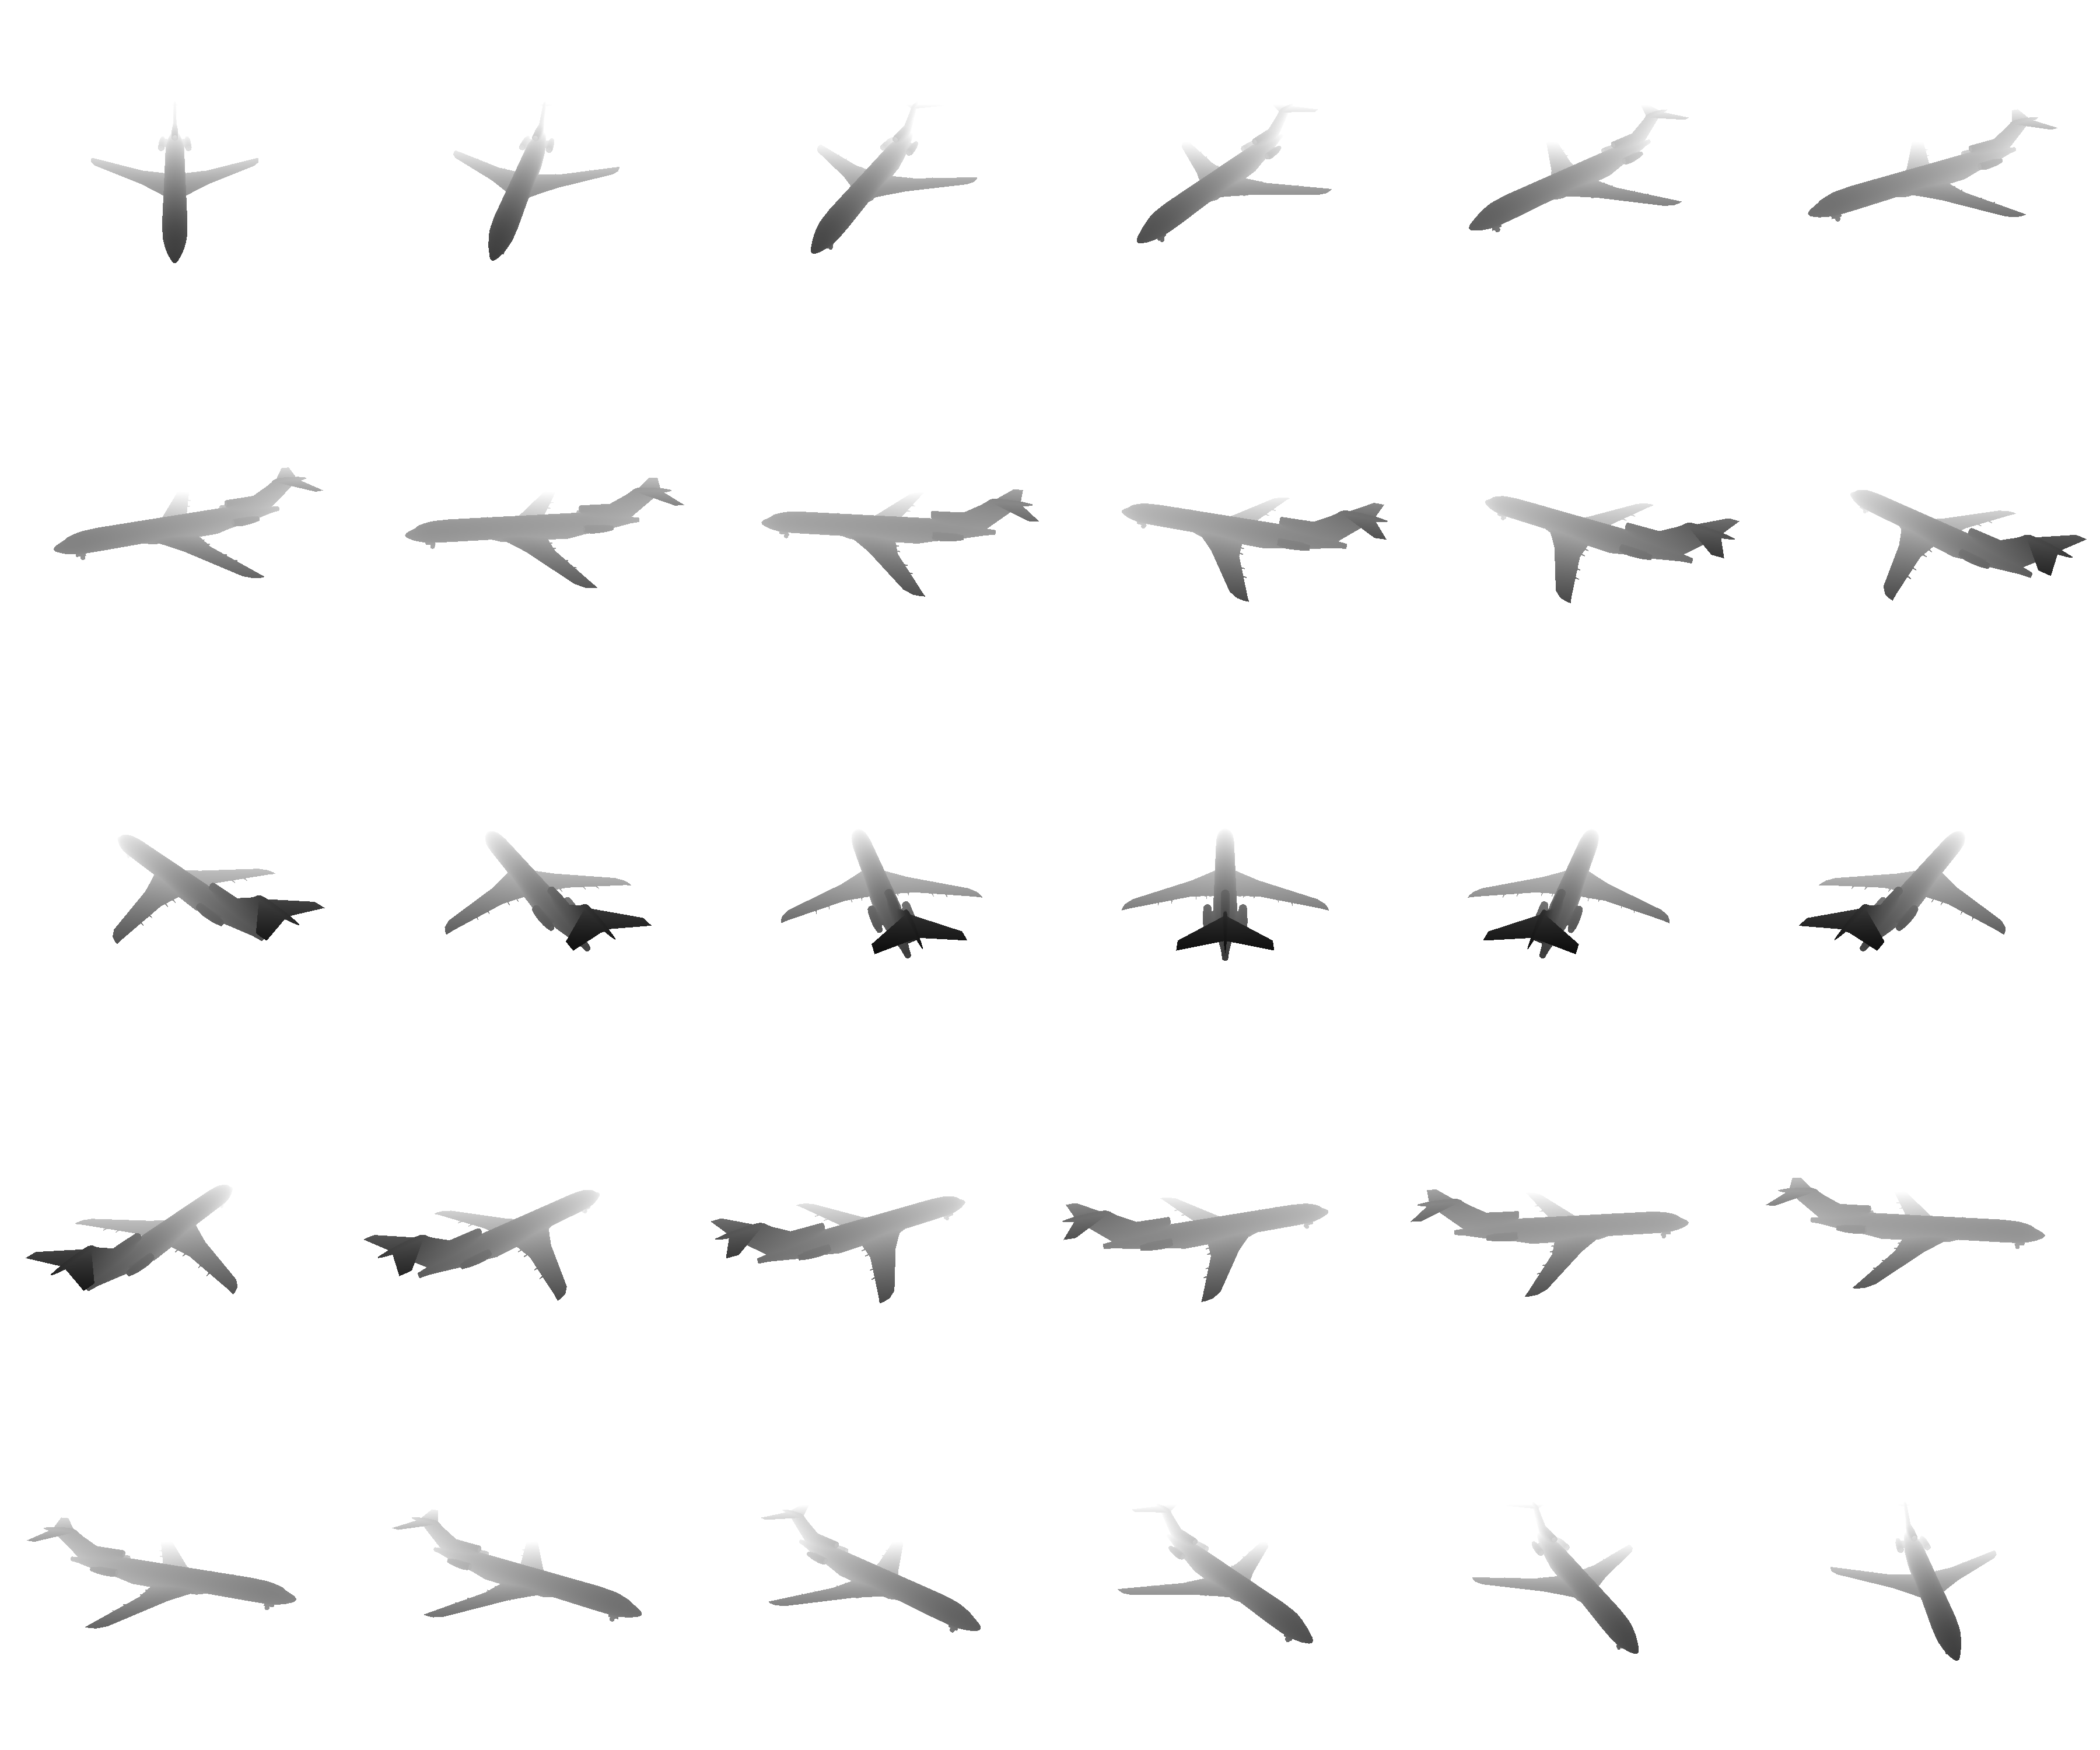

In [87]:
depth_imgs_show

In [88]:
visualize_pointcloud(data["pointcloud_np"])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0004545…

In [89]:
print(data)

{'pointcloud_np': array([[ 2.12700977e-02,  2.09224932e-02, -1.57768349e-01],
       [ 2.17131518e-02,  2.05223643e-02, -1.65848118e-01],
       [ 2.54836052e-02,  1.71150252e-02, -1.63065723e-01],
       ...,
       [ 2.65909097e-02,  9.50754306e-02,  3.53665092e-01],
       [ 6.22607704e-02,  9.44890761e-02,  3.84760910e-01],
       [-2.52822844e-02,  2.50045120e-04, -2.95443804e-01]]), 'angle_1': {'angle': 0, 'image_rgb': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x600 at 0x7F18B0B15650>, 'captions_rgb': ['a 3D view of a large airplane against a gray background', 'an airplane is shown in a grayish color against a dark background', 'the plane is floating in the sky', 'an airplane flying in the sky with no wings', 'a large airplane is shown from up above', 'a large jet airplane in gray color view', 'a single passenger jet flying through gray skies', 'a white airplane flying above in the gray sky', 'there is a plane going up in the air', 'a white jet flying on a clear blu

In [90]:
angle_idx = np.random.randint(len(all_angles))

img_a = data[f'angle_{angle_idx}']['image_rgb']
captions_rgb = data[f'angle_{angle_idx}']['captions_rgb']
img_depth_a = data[f'angle_{angle_idx}']['image_depth']
captions_depth = data[f'angle_{angle_idx}']['captions_depth']

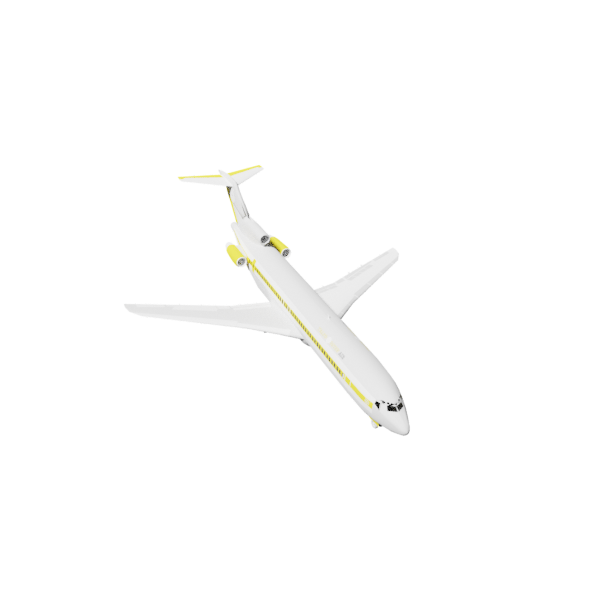

In [91]:
img_a

In [92]:
captions_rgb

['a 3D image of a passenger plane that is in the sky',
 'a low res image of a plane flying in the air',
 'an airplane in flight on a gray background',
 'an airplane flying in the sky on gray ground',
 'an image of a low flying airplane in gray',
 'a 3d image of an airplane in the sky',
 'a grey airplane with two small wheels on the end of it',
 'a white airplane flying in the air and a grey sky background',
 'a white commercial airplane flying in a gray sky',
 'a plane flies up in the sky, leaving a white trail']

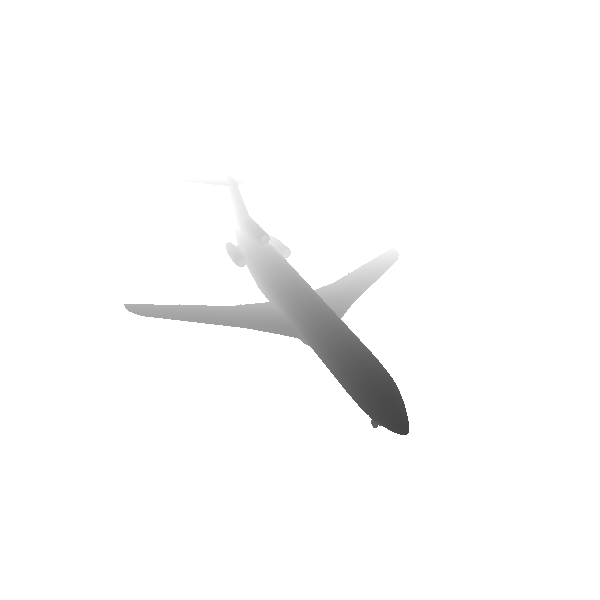

In [93]:
img_depth_a

In [94]:
captions_depth

['a large jet liner flying in the fog',
 'a large airplane with a silhouette through a haze',
 'a plane that is in the foggy sky',
 'an airplane flying through the foggy sky',
 'an image of an airplane in the air',
 'a plane is flying through the air in the fog',
 'a silhouette of an airplane traveling through the air',
 'a plane flying through the clouds, seen from a distance',
 'a plane is flying in the air',
 'an airplane is seen flying high in the sky']